In [1]:
import pandas as pd
import os
from geopy.distance import geodesic

In [2]:
buoy_df = pd.read_excel('./data/vessel_with_nearest_buoy.xlsx')
buoy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ïñ¥ÏÑ†Î≤àÌò∏    7538 non-null   int64  
 1   Ïñ¥ÏÑ†Î™Ö     7481 non-null   object 
 2   ÏÑ†Ï†ÅÌï≠     7538 non-null   object 
 3   ÏúÑÎèÑ      7538 non-null   float64
 4   Í≤ΩÎèÑ      7538 non-null   float64
 5   ÏßÄÏ†êÎ™Ö     7538 non-null   object 
 6   ÏßÄÏ†êÎ≤àÌò∏    7538 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 412.4+ KB


In [3]:
df_filtered = pd.read_csv('./data/mac_stat(110605_240729).csv',encoding='cp949')
df_filtered

C:\Users\ÌïúÍµ≠ÌíàÏßàÏû¨Îã®\AppData\Local\Temp\ipykernel_11368\2076100.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv('./data/mac_stat(110605_240729).csv',encoding='cp949')


ÏúÑÌåêÏùºÏûê Í≤ΩÎß§Ïû•ÏÜåÏΩîÎìú  Îß§ÏàòÎ≤àÌò∏  Îß§ÏàòÏùºÎ†®Î≤àÌò∏    Ï∂úÌïòÎ≤àÌò∏  Ïñ¥ÏóÖÏΩîÎìú        Ïñ¥ÏóÖÎ™Ö  \
0       2024-07-29    001    76       7  969447   271      Ï†ïÏπòÎßùÏñ¥ÏóÖ   
1       2024-07-29    001    76       8  969447   271      Ï†ïÏπòÎßùÏñ¥ÏóÖ   
2       2024-07-29    001    76       6  969447   271      Ï†ïÏπòÎßùÏñ¥ÏóÖ   
3       2024-07-29    001    76       5  969447   271      Ï†ïÏπòÎßùÏñ¥ÏóÖ   
4       2024-07-29    001    75       4  969446   271      Ï†ïÏπòÎßùÏñ¥ÏóÖ   
...            ...    ...   ...     ...     ...   ...        ...   
668495  2011-09-08      2     3       1   74931   131     ÎåÄÌòïÌä∏Î°§Ïñ¥ÏóÖ   
668496  2011-08-30      2     1       9   74787   231     Í∑ºÌï¥Ïó∞ÏäπÏñ¥ÏóÖ   
668497  2011-07-04      2     2      23   74391   181    Í∑ºÌï¥ÏïàÍ∞ïÎßùÏñ¥ÏóÖ   
668498  2011-06-11      2     5      18   73885   182  Ïó∞ÏïàÍ∞úÎüâÏïàÍ∞ïÎßùÏñ¥ÏóÖ   
668499  2011-06-05      2     9      10   73593   183    Ïó∞ÏïàÏïàÍ∞ïÎßùÏñ¥ÏóÖ   

                Ïñ¥ÏÑ†Î≤àÌò∏     Ïñ¥ÏÑ†Î™Ö      ÏÉÅÌíàÏΩîÎìú  ... ÏõêÏÇ∞ÏßÄÍµ¨Î∂ÑÎ™Ö  Ï∂úÌïòÏàòÎüâ   Ï∂úÌïòÏ§ëÎüâ      Ï∂úÌïòÍ∏àÏï°  \
0       9.811004e+13     Ìô©ÏòÅÌò∏  21000646  ...     Íµ≠ÏÇ∞   225    567   2008110   
1       9.811004e+13     Ìô©ÏòÅÌò∏  21000646  ...     Íµ≠ÏÇ∞   225    567   2008110   
2       9.811004e+13     Ìô©ÏòÅÌò∏  21000646  ...     Íµ≠ÏÇ∞   225    567   2008110   
3       9.811004e+13     Ìô©ÏòÅÌò∏  21000646  ...     Íµ≠ÏÇ∞   225    567   2008110   
4       5.110026e+12   Ï†ú7ÌôçÏùºÌò∏  21000646  ...     Íµ≠ÏÇ∞  1484   3212   9483200   
...              ...     ...       ...  ...    ...   ...    ...       ...   
668495  9.610006e+13    27Ïã†Ìôî  21008452  ...     Íµ≠ÏÇ∞  2630  49450  83780000   
668496  2.040046e+12  202Ïû•ÎçïÌò∏  21004204  ...     Íµ≠ÏÇ∞    13     73    719000   
668497  7.020046e+12   Ï†ú5Î∞±ÏÑ±Ìò∏  21004204  ...     Íµ≠ÏÇ∞   134   1069   9884000   
668498  1.050016e+12   77ÏÑ†Í≤ΩÌò∏  21004204  ...     Íµ≠ÏÇ∞   165    340   2160400   
668499  1.303003e+13     ÎßåÏÑ±Ìò∏  21004204  ...     Íµ≠ÏÇ∞   349    563   4110560   

         ÏúÑÌåêÏàòÎüâ  ÏúÑÌåêÎã®Îüâ    ÏúÑÌåêÏ§ëÎüâ      ÏúÑÌåêÎã®Í∞Ä     ÏúÑÌåêÍ∏àÏï°        Îì±Î°ùÏùºÏãú  
0         1.0   5.0     5.0   42100.0    42100  2024-07-29  
1         1.0   5.0     5.0   37790.0    37790  2024-07-29  
2         6.0   5.0    30.0   48990.0   293940  2024-07-29  
3         1.0   5.0     5.0   56000.0    56000  2024-07-29  
4         1.0   5.0     5.0  100000.0   100000  2024-07-29  
...       ...   ...     ...       ...      ...         ...  
668495  630.0  15.0  9450.0    6000.0  3780000  2015-12-04  
668496    1.0   5.0     5.0    5000.0     5000  2015-12-04  
668497    1.0   5.0     5.0   36000.0    36000  2015-12-04  
668498    3.0   5.0    15.0   28000.0    84000  2015-12-04  
668499    1.0  10.0    10.0   40000.0    40000  2015-12-04  

[668500 rows x 28 columns]

In [5]:
buoy_df_unique = buoy_df.drop_duplicates(subset=['Ïñ¥ÏÑ†Î™Ö'])
buoy_df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4594 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ïñ¥ÏÑ†Î≤àÌò∏    4594 non-null   int64  
 1   Ïñ¥ÏÑ†Î™Ö     4593 non-null   object 
 2   ÏÑ†Ï†ÅÌï≠     4594 non-null   object 
 3   ÏúÑÎèÑ      4594 non-null   float64
 4   Í≤ΩÎèÑ      4594 non-null   float64
 5   ÏßÄÏ†êÎ™Ö     4594 non-null   object 
 6   ÏßÄÏ†êÎ≤àÌò∏    4594 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 287.1+ KB


In [6]:
columns_to_add = ['Ïñ¥ÏÑ†Î™Ö', 'ÏßÄÏ†êÎ™Ö', 'ÏßÄÏ†êÎ≤àÌò∏','ÏúÑÎèÑ','Í≤ΩÎèÑ']
mack_df = df_filtered.merge(buoy_df_unique[columns_to_add], on='Ïñ¥ÏÑ†Î™Ö', how='left', suffixes=('', '_buoy'))
mack_df['ÏßÄÏ†êÎ≤àÌò∏'] = mack_df['ÏßÄÏ†êÎ≤àÌò∏'].astype('Int64')

In [7]:
path = './data/hydroclimate_data/'
dir_list = os.listdir(path)
dir_list
hydro_climate = pd.DataFrame()
for dir in dir_list:
  tmp_df = pd.read_excel(path + dir)
  tmp_df = tmp_df.loc[:,tmp_df.columns[:6]]
  hydro_climate = pd.concat([hydro_climate,tmp_df])


In [8]:
list(mack_df.columns)
hydro_climate = hydro_climate.rename(columns = {'ÏßÄÏ†ê':'ÏßÄÏ†êÎ≤àÌò∏'})
mack_df = mack_df.rename(columns={'ÏúÑÌåêÏùºÏûê': 'ÏùºÏûê'})
mack_df.columns = mack_df.columns.str.strip()
hydro_climate.columns = hydro_climate.columns.str.strip()

In [9]:
columns_to_add = list(hydro_climate.columns)
columns_to_add

mack_df['ÏùºÏûê'] = pd.to_datetime(mack_df['ÏùºÏûê'])
hydro_climate['ÏùºÏûê'] = pd.to_datetime(hydro_climate['ÏùºÏûê'])


In [10]:
mack_hc_df = mack_df.merge(hydro_climate[columns_to_add], on=['ÏßÄÏ†êÎ≤àÌò∏','ÏùºÏûê'], how='left', suffixes=('', '_hydro'))
mack_hc_df = mack_hc_df.loc[mack_hc_df['Ïñ¥ÏÑ†Î™Ö'].isin(mack_hc_df['Ïñ¥ÏÑ†Î™Ö'].dropna().unique()), :]
mack_hc_df = mack_hc_df.reset_index(drop=True)

In [11]:
mack_hc_df = mack_hc_df[
    (mack_hc_df['ÏùºÏûê'] >= pd.Timestamp('2013-01-01')) &
    (mack_hc_df['ÏùºÏûê'] <= pd.Timestamp('2023-12-31'))
]
mackerel_names = [
    'Í≥†Îì±Ïñ¥(20ÎØ∏)', 'Í≥†Îì±Ïñ¥', 'Í≥†Îì±Ïñ¥Î•ò', 'Í≥†Îì±Ïñ¥(15ÎØ∏)', 'Í∏∞ÌÉÄÍ≥†Îì±Ïñ¥',
    'Í≥†Îì±Ïñ¥(ÎÉâ)', 'Í≥†Îì±Ïñ¥(ÏÑ†)', 'Í≥†Îì±Ïñ¥(ÎÉâÎèô)', 'ÏÑ†ÎèôÍ≥†Îì±Ïñ¥', 'Í≥†Îì±Ïñ¥(ÏÑ†Îßù)',
    'Í≥†Îì±Ïñ¥,ÏÜå', 'Í≥†Îì±Ïñ¥Î•ò(ÏÑ†Ïñ¥)', 'Í≥†Îì±Ïñ¥(10kgÏù¥Ìïò)', 'Í≥†Îì±Ïñ¥(ÏÜå)',
    'Í≥†Îì±Ïñ¥(10-15kg)', 'Í≥†Îì±Ïñ¥(Ï§ë)', 'Í≥†Îì±Ïñ¥(12)', 'Í≥†Îì±Ïñ¥(25ÎØ∏)',
    'Í≥†Îì±Ïñ¥Â∞è', 'Í≥†Îì±Ïñ¥‰∏≠', 'Í≥†Îì±Ïñ¥ÎπÑÍ∏â', 'Í≥†Îì±Ïñ¥,Ï§ë', 'Í≥†Îì±Ïñ¥(ÏÉÅ)', '(Î∞ò.Í≥†Îì±Ïñ¥)'
]

# ÏÉÅÌíàÎ™Ö Î≥ÄÍ≤Ω
mack_hc_df['ÏÉÅÌíàÎ™Ö'] = mack_hc_df['ÏÉÅÌíàÎ™Ö'].apply(lambda x: 'Í≥†Îì±Ïñ¥' if x in mackerel_names else x)
mack_hc_df = mack_hc_df[mack_hc_df['ÏÉÅÌíàÎ™Ö'].isin(['Í≥†Îì±Ïñ¥', 'Í≥†Îì±Ïñ¥Â§ß'])]

In [12]:
mack_hc_df.columns

Index(['ÏùºÏûê', 'Í≤ΩÎß§Ïû•ÏÜåÏΩîÎìú', 'Îß§ÏàòÎ≤àÌò∏', 'Îß§ÏàòÏùºÎ†®Î≤àÌò∏', 'Ï∂úÌïòÎ≤àÌò∏', 'Ïñ¥ÏóÖÏΩîÎìú', 'Ïñ¥ÏóÖÎ™Ö', 'Ïñ¥ÏÑ†Î≤àÌò∏', 'Ïñ¥ÏÑ†Î™Ö',
       'ÏÉÅÌíàÏΩîÎìú', 'ÏÉÅÌíàÎ™Ö', 'Ïñ¥Ï¢ÖÏÉÅÌÉúÏΩîÎìú', 'Ïñ¥Ï¢ÖÏÉÅÌÉúÎ™Ö', 'ÏÇ∞ÏßÄÏΩîÎìú', 'ÏÇ∞ÏßÄÎ™Ö', 'ÏÇ¨ÏóÖÏû•Î™Ö', 'Ï°∞Ìï©Î™Ö',
       'ÏõêÏÇ∞ÏßÄÍµ¨Î∂ÑÏΩîÎìú', 'ÏõêÏÇ∞ÏßÄÍµ¨Î∂ÑÎ™Ö', 'Ï∂úÌïòÏàòÎüâ', 'Ï∂úÌïòÏ§ëÎüâ', 'Ï∂úÌïòÍ∏àÏï°', 'ÏúÑÌåêÏàòÎüâ', 'ÏúÑÌåêÎã®Îüâ', 'ÏúÑÌåêÏ§ëÎüâ',
       'ÏúÑÌåêÎã®Í∞Ä', 'ÏúÑÌåêÍ∏àÏï°', 'Îì±Î°ùÏùºÏãú', 'ÏßÄÏ†êÎ™Ö', 'ÏßÄÏ†êÎ≤àÌò∏', 'ÏúÑÎèÑ', 'Í≤ΩÎèÑ', 'ÌèâÍ∑†Í∏∞Ïïï', 'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ',
       'ÌèâÍ∑† Í∏∞Ïò®', 'ÌèâÍ∑† ÏàòÏò®'],
      dtype='object')

In [13]:
#df_flt = mack_hc_df[['ÏùºÏûê', 'Ï∂úÌïòÏàòÎüâ', 'Ï∂úÌïòÏ§ëÎüâ', 'Ï∂úÌïòÍ∏àÏï°', 'ÏÇ∞ÏßÄÎ™Ö',  'Ïñ¥ÏóÖÎ™Ö', 'Ïñ¥ÏÑ†Î≤àÌò∏', 'Ïñ¥ÏÑ†Î™Ö', 'ÏÉÅÌíàÏΩîÎìú', 'ÏÉÅÌíàÎ™Ö', 'ÏÇ∞ÏßÄÏΩîÎìú','ÏßÄÏ†êÎ™Ö', 'ÏßÄÏ†êÎ≤àÌò∏', 'ÏúÑÎèÑ', 'Í≤ΩÎèÑ', 'ÌèâÍ∑†Í∏∞Ïïï', 'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ','ÌèâÍ∑† Í∏∞Ïò®', 'ÌèâÍ∑† ÏàòÏò®', 'ÌèâÍ∑† ÏµúÎåÄ ÌååÍ≥†', 'ÌèâÍ∑† Ïú†Ïùò ÌååÍ≥†', 'ÏµúÍ≥† Ïú†Ïùò ÌååÍ≥†', 'ÏµúÍ≥† ÏµúÎåÄ ÌååÍ≥†','ÌèâÍ∑† ÌååÏ£ºÍ∏∞', 'ÏµúÍ≥† ÌååÏ£ºÍ∏∞']]
df_flt = mack_hc_df[['ÏùºÏûê', 'Ï∂úÌïòÏàòÎüâ', 'Ï∂úÌïòÏ§ëÎüâ', 'Ï∂úÌïòÍ∏àÏï°', 'ÏÇ∞ÏßÄÎ™Ö',  'Ïñ¥ÏóÖÎ™Ö', 'Ïñ¥ÏÑ†Î≤àÌò∏', 'Ïñ¥ÏÑ†Î™Ö', 'ÏÉÅÌíàÏΩîÎìú', 'ÏÉÅÌíàÎ™Ö', 'ÏÇ∞ÏßÄÏΩîÎìú','ÏßÄÏ†êÎ™Ö', 'ÏßÄÏ†êÎ≤àÌò∏', 'ÏúÑÎèÑ', 'Í≤ΩÎèÑ', 'ÌèâÍ∑†Í∏∞Ïïï', 'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ','ÌèâÍ∑† Í∏∞Ïò®', 'ÌèâÍ∑† ÏàòÏò®']]

In [14]:
from scipy.spatial import cKDTree

def is_valid_coord(lat, lon):
    return pd.notnull(lat) and pd.notnull(lon)

def build_kdtree(df, column):
    coords = df[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values
    tree = cKDTree(coords)
    return tree, coords

def fill_missing_values(df, column):
    filled_values = []
    grouped = df.groupby('ÏùºÏûê')

    for date, group in grouped:
        valid_rows = group[
            group[column].notnull() &
            group['ÏúÑÎèÑ'].notnull() &
            group['Í≤ΩÎèÑ'].notnull()
        ]

        if valid_rows.empty:
            filled_values.extend([None] * len(group))
            continue

        tree, valid_coords = build_kdtree(valid_rows, column)
        target_coords = group[['ÏúÑÎèÑ', 'Í≤ΩÎèÑ']].values

        distances, indices = tree.query(target_coords, k=1)

        for j, (i, row) in enumerate(group.iterrows()):
            if pd.notnull(row[column]):
                filled_values.append(row[column])
            elif is_valid_coord(row['ÏúÑÎèÑ'], row['Í≤ΩÎèÑ']):
                nearest_idx = indices[j]
                if 0 <= nearest_idx < len(valid_rows):
                    filled_values.append(valid_rows.iloc[nearest_idx][column])
                else:
                    filled_values.append(None)
            else:
                filled_values.append(None)


    return filled_values

# Ï†ÑÏ≤òÎ¶¨
df_flt = df_flt[df_flt['ÏÇ∞ÏßÄÎ™Ö'].notnull()]
df_flt = df_flt[df_flt['ÏßÄÏ†êÎ™Ö'].notnull()]

# Îπ†Î•¥Í≤å Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞


In [15]:
columns_to_fill = [
    'ÌèâÍ∑†Í∏∞Ïïï', 'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ', 'ÌèâÍ∑† Í∏∞Ïò®', 'ÌèâÍ∑† ÏàòÏò®',
    # 'ÌèâÍ∑† ÏµúÎåÄ ÌååÍ≥†', 'ÌèâÍ∑† Ïú†Ïùò ÌååÍ≥†', 'ÏµúÍ≥† Ïú†Ïùò ÌååÍ≥†',
    # 'ÏµúÍ≥† ÏµúÎåÄ ÌååÍ≥†', 'ÌèâÍ∑† ÌååÏ£ºÍ∏∞', 'ÏµúÍ≥† ÌååÏ£ºÍ∏∞'
]

In [16]:
# #df_flt_test = df_flt.iloc[:100000,:]
# df_flt['ÏÇ∞ÏßÄÎ™Ö'].dropna().unique()
# df_flt = df_flt.loc[df_flt['ÏÇ∞ÏßÄÎ™Ö'].isin(df_flt['ÏÇ∞ÏßÄÎ™Ö'].dropna().unique()), :]
# df_flt = df_flt.loc[df_flt['ÏßÄÏ†êÎ™Ö'].isin(df_flt['ÏßÄÏ†êÎ™Ö'].dropna().unique()), :]

In [17]:
for col in columns_to_fill:
     print(f"ÏàòÌñâ Ïª¨Îüº : {col}")
     df_flt[col] = fill_missing_values(df_flt, col)

# Ï†ÄÏû•
df_flt.to_csv("./test1.csv", encoding='utf-8', index=False)


ÏàòÌñâ Ïª¨Îüº : ÌèâÍ∑†Í∏∞Ïïï
ÏàòÌñâ Ïª¨Îüº : ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ
ÏàòÌñâ Ïª¨Îüº : ÌèâÍ∑† Í∏∞Ïò®
ÏàòÌñâ Ïª¨Îüº : ÌèâÍ∑† ÏàòÏò®


In [18]:

df_new = df_flt.copy()
df_new = df_new[df_new['ÌèâÍ∑† ÏàòÏò®'].notnull()]
df_new = df_new[df_new['ÌèâÍ∑† Í∏∞Ïò®'].notnull()]
df_new = df_new[df_new['ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ'].notnull()]
df_new = df_new[df_new['ÌèâÍ∑†Í∏∞Ïïï'].notnull()]

In [19]:
import numpy as np 

def add_temp_category(df):
    conditions = [
        (df['ÌèâÍ∑† ÏàòÏò®'] < 16.0),                    # Ï†ÄÏàòÏò®
        (df['ÌèâÍ∑† ÏàòÏò®'] >= 16.0) & (df['ÌèâÍ∑† ÏàòÏò®'] <= 22.0),  # Ï†ÅÏ†ïÏàòÏò®
        (df['ÌèâÍ∑† ÏàòÏò®'] > 22.0)                    # Í≥†ÏàòÏò®
    ]
    values = [1, 2, 3]

    df['Ï†ÅÏ†ï ÏàòÏò®'] = np.select(conditions, values, default=np.nan)
    return df

In [20]:
def add_recent_frequencies(df, window_rows=60):
    """
    Í∞Å ÌñâÏóêÏÑú ÏßÅÏ†Ñ window_rows Í∞ú ÌñâÏùÑ Í∏∞Ï§ÄÏúºÎ°ú
    'Ï†ÅÏ†ïÏàòÏò® == 1, 2, 3' Í∞ÅÍ∞ÅÏùò Í∞ØÏàòÎ•º ÏÑ∏Ïñ¥
    'ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ', 'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ', 'ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ' Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä
    """
    out = df.copy().reset_index(drop=True)

    low_counts = []     # Ï†ÄÏàòÏò® ÎπàÎèÑ (Ï†ÅÏ†ïÏàòÏò® == 1)
    optimal_counts = [] # Ï†ÅÏ†ïÏàòÏò® ÎπàÎèÑ (Ï†ÅÏ†ïÏàòÏò® == 2)
    high_counts = []    # Í≥†ÏàòÏò® ÎπàÎèÑ (Ï†ÅÏ†ïÏàòÏò® == 3)

    for i in range(len(out)):
        if i < window_rows:  
            # Ï¥àÍ∏∞ Íµ¨Í∞ÑÏùÄ NaN
            low_counts.append(np.nan)
            optimal_counts.append(np.nan)
            high_counts.append(np.nan)
        else:
            # ÏßÅÏ†Ñ window_rows Íµ¨Í∞Ñ Ï∂îÏ∂ú
            window = out.iloc[i-window_rows:i]

            low_counts.append((window['Ï†ÅÏ†ï ÏàòÏò®'] == 1).sum())
            optimal_counts.append((window['Ï†ÅÏ†ï ÏàòÏò®'] == 2).sum())
            high_counts.append((window['Ï†ÅÏ†ï ÏàòÏò®'] == 3).sum())

    out['ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ'] = low_counts
    out['ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ'] = optimal_counts
    out['ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ'] = high_counts

    return out


In [21]:
df_new = add_temp_category(df_new)

In [22]:
df_new_2 = add_recent_frequencies(df_new)

In [23]:
df_new_2.to_csv('./mackerel_fishery_combined_hydroclimate_V5.csv', encoding='utf-8',index=False)

In [24]:
df_new_2.loc[df_new_2['ÏßÄÏ†êÎ≤àÌò∏'] == 22311,:]

ÏùºÏûê  Ï∂úÌïòÏàòÎüâ  Ï∂úÌïòÏ§ëÎüâ      Ï∂úÌïòÍ∏àÏï°     ÏÇ∞ÏßÄÎ™Ö     Ïñ¥ÏóÖÎ™Ö          Ïñ¥ÏÑ†Î≤àÌò∏    Ïñ¥ÏÑ†Î™Ö  \
24     2023-12-31   232  3584  52187000    Ï†ÑÎùºÎÇ®ÎèÑ  Í∑ºÌï¥ÏûêÎßùÏñ¥ÏóÖ  1.205004e+13    ÎèôÏßÑÌò∏   
28     2023-12-31   232  3584  52187000    Ï†ÑÎùºÎÇ®ÎèÑ  Í∑ºÌï¥ÏûêÎßùÏñ¥ÏóÖ  1.205004e+13    ÎèôÏßÑÌò∏   
29     2023-12-31    24   180   4062800     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  1.605004e+13  77ÏÑ±ÏßÑÌò∏   
102    2023-12-30   466   715   2923200     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  6.090016e+12    ÎåÄÏùºÌò∏   
103    2023-12-30   466   715   2923200     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  6.090016e+12    ÎåÄÏùºÌò∏   
...           ...   ...   ...       ...     ...     ...           ...    ...   
567838 2013-01-04   279  1445   5059280     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  2.110016e+12  Ï†ú2Ìô©ÏòÅÌò∏   
567946 2013-01-02     2     2    243000  Í≤ΩÎ∂Å Ìè¨Ìï≠Ïãú  Ïó∞ÏïàÏûêÎßùÏñ¥ÏóÖ  4.050026e+12    Ïó∞ÏàòÌò∏   
567947 2013-01-02     5    42     74000  Í≤ΩÎ∂Å Ìè¨Ìï≠Ïãú  Ïó∞ÏïàÏûêÎßùÏñ¥ÏóÖ  4.080166e+12    Ï∞ΩÏÑ±Ìò∏   
567962 2013-01-02     5    44    207000     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  9.610002e+13    ÏßÑÏñëÌò∏   
567963 2013-01-02     5    44    207000     Í∞ïÏõêÎèÑ   Ï†ïÏπòÎßùÏñ¥ÏóÖ  9.610002e+13    ÏßÑÏñëÌò∏   

            ÏÉÅÌíàÏΩîÎìú  ÏÉÅÌíàÎ™Ö  ...         ÏúÑÎèÑ          Í≤ΩÎèÑ    ÌèâÍ∑†Í∏∞Ïïï  ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ  ÌèâÍ∑† Í∏∞Ïò®  \
24      21003079  Í≥†Îì±Ïñ¥  ...  37.186920  129.300850  1024.1     49.0   -0.7   
28      21003079  Í≥†Îì±Ïñ¥  ...  37.186920  129.300850  1024.1     49.0   -0.7   
29      21003079  Í≥†Îì±Ïñ¥  ...  37.449874  129.165297  1024.1     49.0   -0.7   
102     21003757  Í≥†Îì±Ïñ¥  ...  37.524514  129.114630  1028.9     61.0    7.5   
103     21003757  Í≥†Îì±Ïñ¥  ...  37.524514  129.114630  1028.9     61.0    7.5   
...          ...  ...  ...        ...         ...     ...      ...    ...   
567838  21000646  Í≥†Îì±Ïñ¥  ...  37.524514  129.114630  1016.9     56.0   10.2   
567946  21004762  Í≥†Îì±Ïñ¥  ...  37.449874  129.165297  1017.2     76.0   15.8   
567947  21004762  Í≥†Îì±Ïñ¥  ...  37.524514  129.114630  1015.8     82.0    7.5   
567962  21002629  Í≥†Îì±Ïñ¥  ...  37.449874  129.165297  1025.2     62.0    8.6   
567963  21002629  Í≥†Îì±Ïñ¥  ...  37.449874  129.165297  1030.0     67.0   11.1   

        ÌèâÍ∑† ÏàòÏò®  Ï†ÅÏ†ï ÏàòÏò®  ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ  ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ  ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ  
24       11.5    1.0      NaN       NaN      NaN  
28       11.5    1.0      NaN       NaN      NaN  
29       11.5    1.0      NaN       NaN      NaN  
102      16.5    2.0     46.0      14.0      0.0  
103      16.5    2.0     45.0      15.0      0.0  
...       ...    ...      ...       ...      ...  
567838   14.0    1.0     58.0       2.0      0.0  
567946   18.6    2.0     14.0      46.0      0.0  
567947   10.3    1.0     14.0      46.0      0.0  
567962   15.1    1.0     16.0      44.0      0.0  
567963   16.9    2.0     16.0      44.0      0.0  

[59329 rows x 23 columns]

In [25]:
df_new_2.groupby(by=['ÏùºÏûê','ÏßÄÏ†êÎ™Ö','ÏÉÅÌíàÎ™Ö']).agg({
    'ÏßÄÏ†êÎ≤àÌò∏' : 'mean',
    'Ï∂úÌïòÏàòÎüâ': 'sum',
    'Ï∂úÌïòÏ§ëÎüâ': 'sum',
    'Ï∂úÌïòÍ∏àÏï°': 'sum',
    'ÌèâÍ∑†Í∏∞Ïïï' : 'mean',
    'ÌèâÍ∑† Í∏∞Ïò®': 'mean',
    'ÌèâÍ∑† ÏàòÏò®': 'mean',
    'Ï†ÅÏ†ï ÏàòÏò®': 'mean',
    'ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ' : 'mean',
    'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ' : 'mean',
    'ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ' : 'mean',
}).reset_index().to_csv('./test2.csv', encoding='utf-8', index=False)


In [26]:
df2 = df_new_2.groupby(by=['ÏùºÏûê','ÏßÄÏ†êÎ™Ö','ÏÉÅÌíàÎ™Ö']).agg({
    'ÏßÄÏ†êÎ≤àÌò∏' : 'mean',
    'Ï∂úÌïòÏàòÎüâ': 'sum',
    'Ï∂úÌïòÏ§ëÎüâ': 'sum',
    'Ï∂úÌïòÍ∏àÏï°': 'sum',
    'ÌèâÍ∑†Í∏∞Ïïï' : 'mean',
    'ÌèâÍ∑† Í∏∞Ïò®': 'mean',
    'ÌèâÍ∑† ÏàòÏò®': 'mean',
    'Ï†ÅÏ†ï ÏàòÏò®': 'mean',
    'ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ' : 'mean',
    'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ' : 'mean',
    'ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ' : 'mean',
}).reset_index()

In [27]:
m_df = pd.read_excel('./data/add_freq_Marado.xlsx')
p_df = pd.read_excel('./data/add_freq_Pohang.xlsx')

In [28]:
m_df

ÏùºÏûê   ÏßÄÏ†êÎ≤àÌò∏    ÌèâÍ∑†Í∏∞Ïïï  ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ  ÌèâÍ∑† Í∏∞Ïò®  ÌèâÍ∑† ÏàòÏò®  Ï†ÅÏ†ïÏàòÏò®  ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ  \
0    2012-07-01  22107  1006.7     96.0   23.2   22.4     3       NaN   
1    2012-07-02  22107  1004.1     97.0   23.6   22.5     3       NaN   
2    2012-07-03  22107  1002.6     95.0   23.6   22.7     3       NaN   
3    2012-07-04  22107  1005.5     94.0   24.4   22.9     3       NaN   
4    2012-07-05  22107  1007.0     98.0   24.9   23.1     3       NaN   
...         ...    ...     ...      ...    ...    ...   ...       ...   
4170 2023-12-15  22107  1018.4     84.0    4.9   19.8     2      36.0   
4171 2023-12-16  22107  1028.3     75.0    5.1   19.6     2      37.0   
4172 2023-12-17  22107  1035.2     73.0    5.2   19.4     2      38.0   
4173 2023-12-18  22107  1035.2     72.0    6.3   19.4     2      39.0   
4174 2023-12-19  22107  1032.3     71.7    8.6   18.5     2      40.0   

      ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ  ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ  
0         NaN      NaN  
1         NaN      NaN  
2         NaN      NaN  
3         NaN      NaN  
4         NaN      NaN  
...       ...      ...  
4170      0.0     24.0  
4171      0.0     23.0  
4172      0.0     22.0  
4173      0.0     21.0  
4174      0.0     20.0  

[4175 rows x 10 columns]

In [29]:
shipment_summary = (
    mack_df.groupby(['ÏùºÏûê', 'ÏßÄÏ†êÎ≤àÌò∏'])[['Ï∂úÌïòÏàòÎüâ', 'Ï∂úÌïòÏ§ëÎüâ', 'Ï∂úÌïòÍ∏àÏï°']]
    .sum()
    .reset_index()
)
shipment_summary['ÏùºÏûê'] = pd.to_datetime(shipment_summary['ÏùºÏûê'])

In [30]:
shipment_summary.loc[shipment_summary['ÏßÄÏ†êÎ≤àÌò∏'] == 22107,:]
m_df['ÏßÄÏ†êÎ≤àÌò∏']

0       22107
1       22107
2       22107
3       22107
4       22107
        ...  
4170    22107
4171    22107
4172    22107
4173    22107
4174    22107
Name: ÏßÄÏ†êÎ≤àÌò∏, Length: 4175, dtype: int64

In [31]:
mara_df = pd.merge(
    m_df,
    shipment_summary.loc[shipment_summary['ÏßÄÏ†êÎ≤àÌò∏'] == 22107,:],
    on=['ÏùºÏûê', 'ÏßÄÏ†êÎ≤àÌò∏'],
    how='left'  # m_df Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
)
mara_df.to_excel('./freq_Marado.xlsx',index=False)

In [32]:
poh_df = pd.merge(
    p_df,
    shipment_summary.loc[shipment_summary['ÏßÄÏ†êÎ≤àÌò∏'] == 22106,:],
    on=['ÏùºÏûê', 'ÏßÄÏ†êÎ≤àÌò∏'],
    how='left'  # m_df Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
)
poh_df.to_excel('./freq_Pohang.xlsx',index=False)

In [33]:
mara_df

ÏùºÏûê   ÏßÄÏ†êÎ≤àÌò∏    ÌèâÍ∑†Í∏∞Ïïï  ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ  ÌèâÍ∑† Í∏∞Ïò®  ÌèâÍ∑† ÏàòÏò®  Ï†ÅÏ†ïÏàòÏò®  ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ  \
0    2012-07-01  22107  1006.7     96.0   23.2   22.4     3       NaN   
1    2012-07-02  22107  1004.1     97.0   23.6   22.5     3       NaN   
2    2012-07-03  22107  1002.6     95.0   23.6   22.7     3       NaN   
3    2012-07-04  22107  1005.5     94.0   24.4   22.9     3       NaN   
4    2012-07-05  22107  1007.0     98.0   24.9   23.1     3       NaN   
...         ...    ...     ...      ...    ...    ...   ...       ...   
4170 2023-12-15  22107  1018.4     84.0    4.9   19.8     2      36.0   
4171 2023-12-16  22107  1028.3     75.0    5.1   19.6     2      37.0   
4172 2023-12-17  22107  1035.2     73.0    5.2   19.4     2      38.0   
4173 2023-12-18  22107  1035.2     72.0    6.3   19.4     2      39.0   
4174 2023-12-19  22107  1032.3     71.7    8.6   18.5     2      40.0   

      ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ  ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ    Ï∂úÌïòÏàòÎüâ     Ï∂úÌïòÏ§ëÎüâ         Ï∂úÌïòÍ∏àÏï°  
0         NaN      NaN     NaN      NaN          NaN  
1         NaN      NaN     NaN      NaN          NaN  
2         NaN      NaN     NaN      NaN          NaN  
3         NaN      NaN     NaN      NaN          NaN  
4         NaN      NaN     NaN      NaN          NaN  
...       ...      ...     ...      ...          ...  
4170      0.0     24.0  2374.0  27505.0  275209900.0  
4171      0.0     23.0  1005.0  13740.0  154674600.0  
4172      0.0     22.0     NaN      NaN          NaN  
4173      0.0     21.0    14.0    138.0    1323120.0  
4174      0.0     20.0     NaN      NaN          NaN  

[4175 rows x 13 columns]

In [34]:
df_22107_out = mara_df.copy()
df_22106_out = poh_df.copy()

In [35]:
# 'ÏùºÏûê' Ïª¨ÎüºÏùÑ 'yyyy-mm' ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df_22107_out['ÎÖÑÏõî'] = df_22107_out['ÏùºÏûê'].dt.to_period('M').astype(str) #ÎßàÎùºÎèÑ
df_22106_out['ÎÖÑÏõî'] = df_22106_out['ÏùºÏûê'].dt.to_period('M').astype(str) #Ìè¨Ìï≠

def group_ym(df): 
  return df.groupby('ÎÖÑÏõî').agg({
    'ÏßÄÏ†êÎ≤àÌò∏': 'first',           # ÎòêÎäî 'mean', 'mode' Îì± ÏõêÌïòÎäî Î∞©Ïãù
    'ÌèâÍ∑†Í∏∞Ïïï': 'mean',
    'ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ': 'mean',
    'ÌèâÍ∑† Í∏∞Ïò®': 'mean',
    'ÌèâÍ∑† ÏàòÏò®': 'mean',
    'Ï†ÅÏ†ïÏàòÏò®': 'mean',
    'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ': 'mean',
    'ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ': 'mean',
    'ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ': 'mean',
    'Ï∂úÌïòÏàòÎüâ': 'sum',
    'Ï∂úÌïòÏ§ëÎüâ': 'sum',
    'Ï∂úÌïòÍ∏àÏï°': 'sum'
}).reset_index()


mar_grp = group_ym(df_22107_out).loc[6:,:]
poh_grp = group_ym(df_22106_out).loc[6:,:]

In [36]:
mar_test = df_22107_out.loc[df_22107_out['ÎÖÑÏõî'] >= '2013-01',:].dropna()
poh_test = df_22106_out.loc[df_22106_out['ÎÖÑÏõî'] >= '2013-01',:].dropna()
mar_test.to_excel('./mar_test.xlsx',index=False)
poh_test.to_excel('./poh_test.xlsx',index=False)

In [40]:
poh_test.to_excel("./Î∂ÑÏÑùÏö©_ÏùºÎ≥Ñ_Ìè¨Ìï≠Îç∞Ïù¥ÌÑ∞.xlsx", index= False)

In [41]:
mar_test.to_excel("./Î∂ÑÏÑùÏö©_ÏùºÎ≥Ñ_ÎßàÎùºÎèÑÎç∞Ïù¥ÌÑ∞.xlsx", index= False)

In [37]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
### ÌïúÍ∏ÄÏ≤òÎ¶¨(ÏãúÍ∞ÅÌôî Ïãú Í∑∏ÎûòÌîÑ ÎÇ¥Ïóê ÌïúÍ∏ÄÏù¥ Ìè¨Ìï®ÎêòÎäî Í≤ΩÏö∞ ÌïúÍ∏Ä Íπ®Ïßê ÌòÑÏÉÅ Î∞©ÏßÄ)
plt.rc("font", family="Malgun Gothic")

### ÌäπÏàòÍ∏∞Ìò∏(ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏) Ï≤òÎ¶¨
plt.rcParams["axes.unicode_minus"] = False


# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº (Ï∂úÌïòÏ§ëÎüâ Ï†úÏô∏)
features = [
    'ÌèâÍ∑†Í∏∞Ïïï','ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ',	'ÌèâÍ∑† Í∏∞Ïò®','ÌèâÍ∑† ÏàòÏò®','Ï†ÅÏ†ïÏàòÏò®',	'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ'

]
target = 'Ï∂úÌïòÏ§ëÎüâ'

X = mar_test[features]
y = mar_test[target]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) ÌîºÏñ¥Ïä®, Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
pearson_corr = X.corrwith(y, method='pearson')
spearman_corr = X.corrwith(y, method='spearman')

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) Mutual Information (ÎπÑÏÑ†Ìòï Ìè¨Ìï®)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Ïä§ÏºÄÏùºÎßÅ (MIÎäî Ïä§ÏºÄÏùº ÏòÅÌñ• Ïïà Î∞õÏßÄÎßå, ÏàòÏπò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Í∂åÏû•)
X_scaled = StandardScaler().fit_transform(X)

mi_scores = mutual_info_regression(X_scaled, y, random_state=0)
mi_series = pd.Series(mi_scores, index=features)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) ÌÜµÌï© Í≤∞Í≥º ÌÖåÏù¥Î∏î
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
result = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Mutual_Info': mi_series
}).sort_values(by='Mutual_Info', ascending=False)

print(result)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉù)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

result['Pearson'].plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Pearson)")
axes[0].set_ylabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò")

result['Spearman'].plot.bar(ax=axes[1], color='lightgreen')
axes[1].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Spearman)")
axes[1].set_ylabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò")

result['Mutual_Info'].plot.bar(ax=axes[2], color='salmon')
axes[2].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Mutual Information)")
axes[2].set_ylabel("MI Score")

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

           Pearson  Spearman  Mutual_Info
ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ  -0.244591 -0.418219     0.128689
ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ   0.251367  0.391007     0.090721
Ï†ÅÏ†ïÏàòÏò®      0.178268  0.314649     0.073962
ÌèâÍ∑† ÏàòÏò®     0.193406  0.327767     0.069750
ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ  0.037895  0.200375     0.038462
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ   0.017368  0.017728     0.019631
ÌèâÍ∑† Í∏∞Ïò®     0.111924  0.188630     0.017405
ÌèâÍ∑†Í∏∞Ïïï      0.009803  0.010795     0.017257


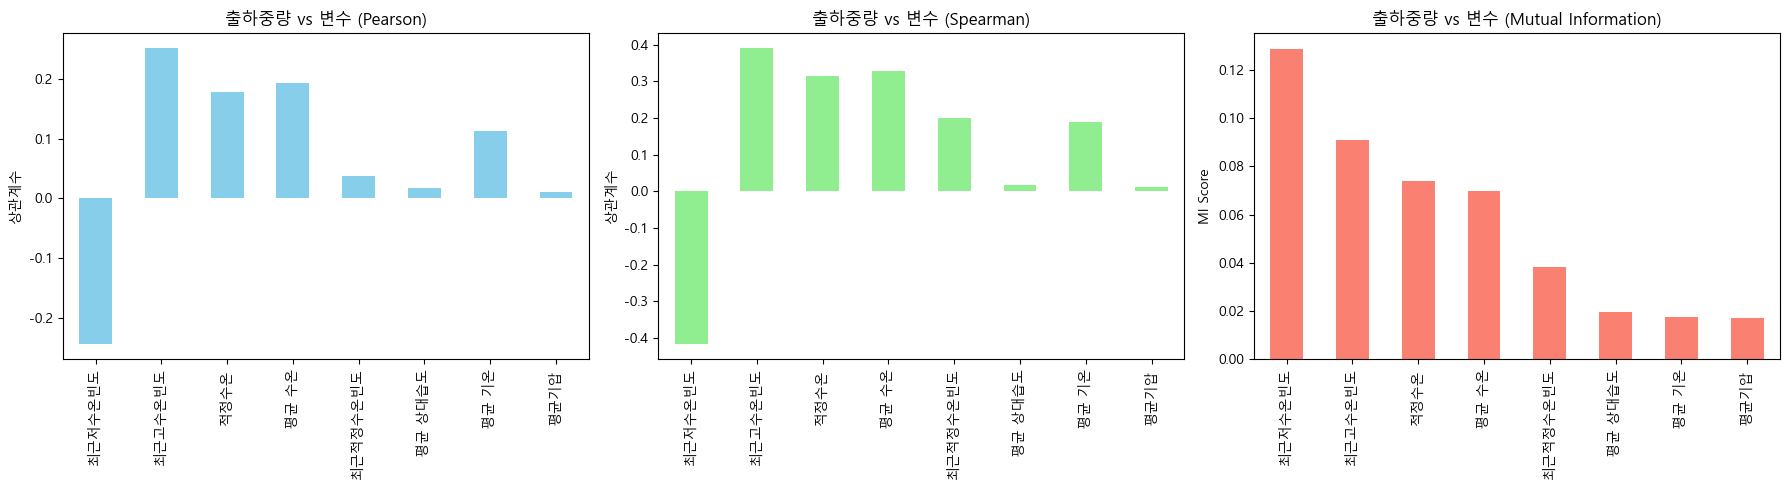

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
### ÌïúÍ∏ÄÏ≤òÎ¶¨(ÏãúÍ∞ÅÌôî Ïãú Í∑∏ÎûòÌîÑ ÎÇ¥Ïóê ÌïúÍ∏ÄÏù¥ Ìè¨Ìï®ÎêòÎäî Í≤ΩÏö∞ ÌïúÍ∏Ä Íπ®Ïßê ÌòÑÏÉÅ Î∞©ÏßÄ)
plt.rc("font", family="Malgun Gothic")

### ÌäπÏàòÍ∏∞Ìò∏(ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏) Ï≤òÎ¶¨
plt.rcParams["axes.unicode_minus"] = False


# Î∂ÑÏÑù ÎåÄÏÉÅ Ïª¨Îüº (Ï∂úÌïòÏ§ëÎüâ Ï†úÏô∏)
features = [
    'ÌèâÍ∑†Í∏∞Ïïï','ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ',	'ÌèâÍ∑† Í∏∞Ïò®','ÌèâÍ∑† ÏàòÏò®','Ï†ÅÏ†ïÏàòÏò®',	'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ'
]
target = 'Ï∂úÌïòÏ§ëÎüâ'

X = poh_test[features]
y = poh_test[target]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) ÌîºÏñ¥Ïä®, Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
pearson_corr = X.corrwith(y, method='pearson')
spearman_corr = X.corrwith(y, method='spearman')

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) Mutual Information (ÎπÑÏÑ†Ìòï Ìè¨Ìï®)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Ïä§ÏºÄÏùºÎßÅ (MIÎäî Ïä§ÏºÄÏùº ÏòÅÌñ• Ïïà Î∞õÏßÄÎßå, ÏàòÏπò ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Í∂åÏû•)
X_scaled = StandardScaler().fit_transform(X)

mi_scores = mutual_info_regression(X_scaled, y, random_state=0)
mi_series = pd.Series(mi_scores, index=features)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) ÌÜµÌï© Í≤∞Í≥º ÌÖåÏù¥Î∏î
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
result = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Mutual_Info': mi_series
}).sort_values(by='Mutual_Info', ascending=False)

print(result)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉù)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

result['Pearson'].plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Pearson)")
axes[0].set_ylabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò")

result['Spearman'].plot.bar(ax=axes[1], color='lightgreen')
axes[1].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Spearman)")
axes[1].set_ylabel("ÏÉÅÍ¥ÄÍ≥ÑÏàò")

result['Mutual_Info'].plot.bar(ax=axes[2], color='salmon')
axes[2].set_title("Ï∂úÌïòÏ§ëÎüâ vs Î≥ÄÏàò (Mutual Information)")
axes[2].set_ylabel("MI Score")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# ===== Î∂ÑÏÑù ÎåÄÏÉÅ =====
df = mar_test.copy()
target = 'Ï∂úÌïòÏ§ëÎüâ'
features = [
    'ÌèâÍ∑†Í∏∞Ïïï','ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ',	'ÌèâÍ∑† Í∏∞Ïò®','ÌèâÍ∑† ÏàòÏò®','Ï†ÅÏ†ïÏàòÏò®',	'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ'
]

n_permutations = 1000
random_state = 0

# ===== Mutual Information + permutation p-value =====
def mi_perm_test_1d(x, y, n_perm=1000, rs=0):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x_ = x[mask].reshape(-1, 1)
    y_ = y[mask]
    if len(y_) < 5 or np.nanstd(x_) == 0:
        return np.nan, np.nan

    X_scaled = StandardScaler().fit_transform(x_)

    rng = np.random.RandomState(rs)
    mi_true = mutual_info_regression(X_scaled, y_, random_state=rs)[0]

    null = []
    for _ in range(n_perm):
        y_perm = rng.permutation(y_)
        mi_perm = mutual_info_regression(X_scaled, y_perm, random_state=rs)[0]
        null.append(mi_perm)
    null = np.array(null)
    p_val = (null >= mi_true).mean()
    return mi_true, p_val

# ===== ÎûòÍ∑∏ Ï†ÅÏö©Ïö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ =====
df['_date'] = pd.to_datetime(df['ÏùºÏûê']) 
df = df.sort_values('_date').reset_index(drop=True)

lags = range(-10, 11)  # -10Ïùº ~ +10Ïùº

rows = []

for lag in lags:
    df_lag = df.copy()
    
    for col in features:
        df_lag[f'{col}_lag{lag}'] = df_lag[col].shift(-lag)  # lagÍ∞Ä ÏùåÏàòÎ©¥ ÎØ∏Îûò, ÏñëÏàòÎ©¥ Í≥ºÍ±∞

    Xcols = [f'{col}_lag{lag}' for col in features]
    valid = df_lag[[target] + Xcols].dropna().index

    if len(valid) < 8:
        continue

    y_vec = df_lag.loc[valid, target].to_numpy()

    for col in features:
        x_vec = df_lag.loc[valid, f'{col}_lag{lag}'].to_numpy()

        try:
            pr, pr_p = pearsonr(x_vec, y_vec)
        except Exception:
            pr, pr_p = (np.nan, np.nan)

        try:
            sr, sr_p = spearmanr(x_vec, y_vec)
        except Exception:
            sr, sr_p = (np.nan, np.nan)

        mi, mi_p = mi_perm_test_1d(x_vec, y_vec,
                                   n_perm=n_permutations,
                                   rs=random_state)

        rows.append({
            'Variable': col,
            'Lag': lag,
            'n': len(y_vec),
            'Pearson': pr, 'Pearson_p': pr_p,
            'Spearman': sr, 'Spearman_p': sr_p,
            'MI': mi, 'MI_p': mi_p
        })


# ===== Í≤∞Í≥º Ï†ïÎ¶¨ =====
result_lag = pd.DataFrame(rows)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
result_lag = result_lag.sort_values(['Variable','Lag']).reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
print(result_lag.head(20))

# MI Í∏∞Ï§Ä ÏÉÅÏúÑ Î≥ÄÏàò Î≥¥Í∏∞
print("\nüîé Mutual Information Í∏∞Ï§Ä Top 10")
print(result_lag.sort_values('MI', ascending=False).head(10))

# ÌïÑÏöî Ïãú Ï†ÄÏû•
result_lag.to_excel("lagged_correlation_analysis_MAR_dbd.xlsx", index=False)

   Variable  Lag     n   Pearson  Pearson_p  Spearman  Spearman_p        MI  \
0      Ï†ÅÏ†ïÏàòÏò®  -10  3369  0.069786   0.000050  0.062414    0.000289  0.025067   
1      Ï†ÅÏ†ïÏàòÏò®   -9  3370  0.078101   0.000006  0.064351    0.000185  0.028974   
2      Ï†ÅÏ†ïÏàòÏò®   -8  3371  0.080612   0.000003  0.064231    0.000190  0.036769   
3      Ï†ÅÏ†ïÏàòÏò®   -7  3372  0.082947   0.000001  0.066560    0.000110  0.038183   
4      Ï†ÅÏ†ïÏàòÏò®   -6  3373  0.078388   0.000005  0.065486    0.000141  0.033682   
5      Ï†ÅÏ†ïÏàòÏò®   -5  3374  0.077660   0.000006  0.065944    0.000126  0.036329   
6      Ï†ÅÏ†ïÏàòÏò®   -4  3375  0.079621   0.000004  0.068480    0.000068  0.028924   
7      Ï†ÅÏ†ïÏàòÏò®   -3  3376  0.083185   0.000001  0.063353    0.000230  0.044323   
8      Ï†ÅÏ†ïÏàòÏò®   -2  3377  0.081006   0.000002  0.065061    0.000155  0.047322   
9      Ï†ÅÏ†ïÏàòÏò®   -1  3378  0.080263   0.000003  0.066270    0.000116  0.038123   
10     Ï†ÅÏ†ïÏàòÏò®    0  3379  0.082138   0.000002

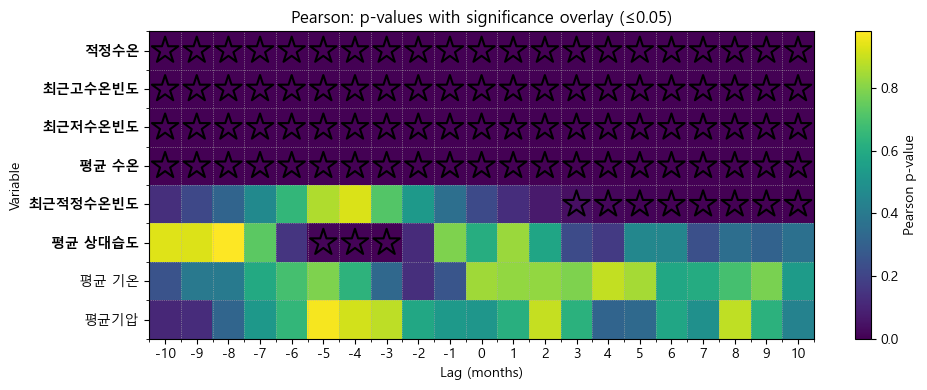

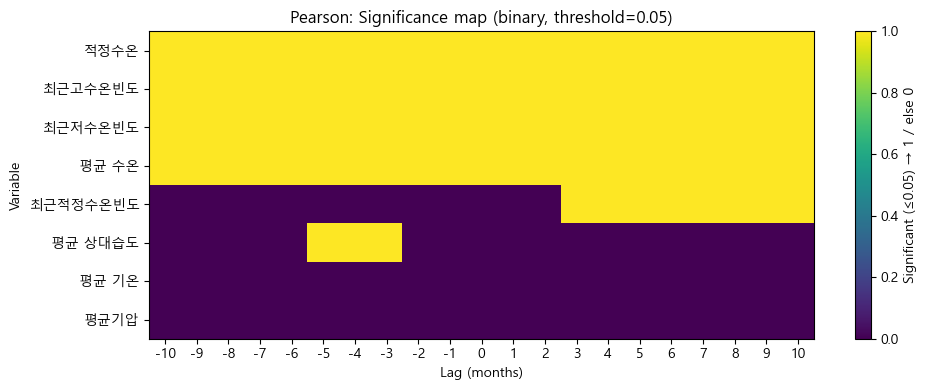

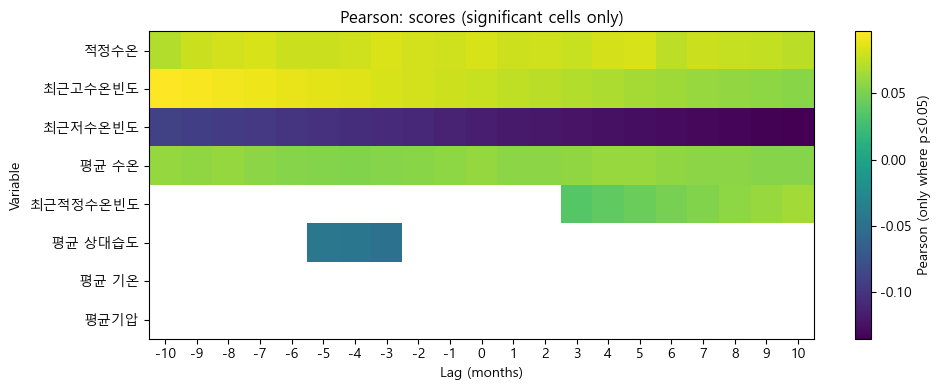

üîé Pearson Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ=0.05)


n_sig_lags        best_p  best_lag
Variable                                    
ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ           21  3.896205e-15        10
ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ           21  1.937155e-08       -10
Ï†ÅÏ†ïÏàòÏò®              21  1.298914e-06        -3
ÌèâÍ∑† ÏàòÏò®             21  3.673164e-04         5
ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ           8  1.771546e-04        10
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ            3  4.559880e-03        -3
ÌèâÍ∑†Í∏∞Ïïï               0  1.094256e-01       -10
ÌèâÍ∑† Í∏∞Ïò®              0  1.328668e-01        -2

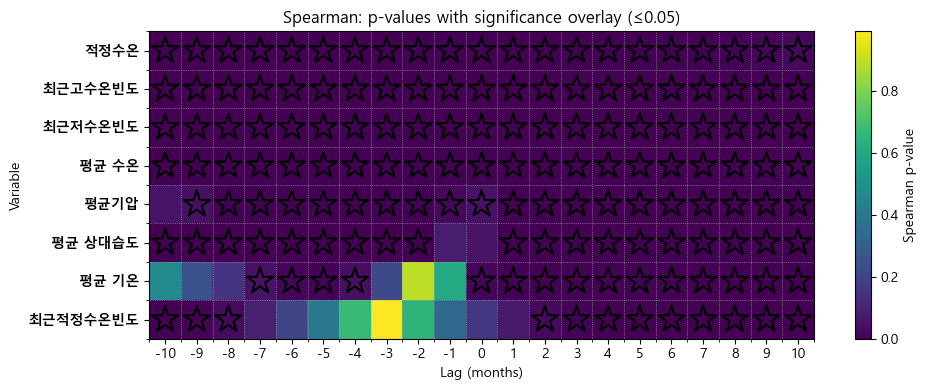

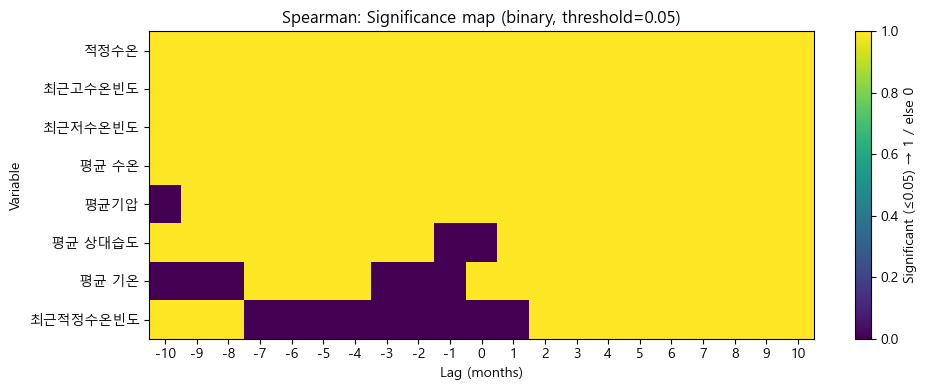

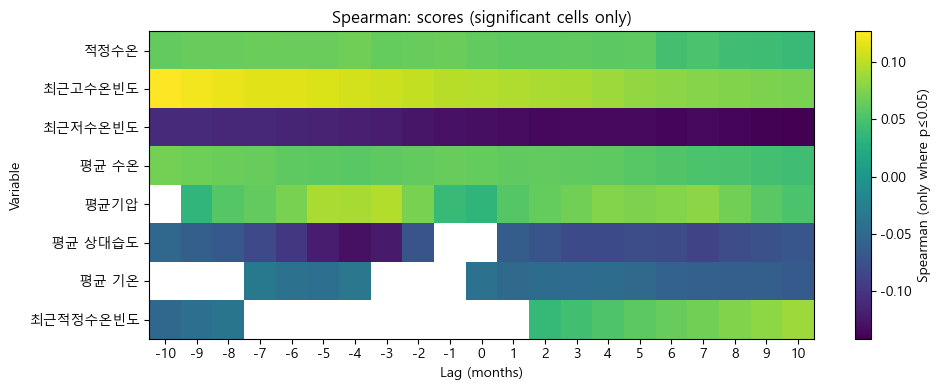

üîé Spearman Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ=0.05)


n_sig_lags        best_p  best_lag
Variable                                    
ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ           21  1.099329e-16        10
ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ           21  1.222380e-13       -10
ÌèâÍ∑† ÏàòÏò®             21  4.203168e-05       -10
Ï†ÅÏ†ïÏàòÏò®              21  6.847672e-05        -4
ÌèâÍ∑†Í∏∞Ïïï              20  2.032593e-08        -3
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ           19  3.422128e-14        -4
ÌèâÍ∑† Í∏∞Ïò®             15  1.326978e-04        10
ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ          12  3.519908e-07        10

In [ ]:

def plot_sig_maps_striking(result_lag, metric_name, thresh=0.05):
    """
    result_lag: columns ['Variable','Lag', metric, metric+'_p'] ÌïÑÏöî
    metric_name: 'Pearson' | 'Spearman' | 'MI'
    thresh: Ïú†ÏùòÏàòÏ§Ä (Í∏∞Î≥∏ 0.05)
    """
    val_col = metric_name
    p_col   = f"{metric_name}_p"

    # 1) ÌîºÎ≤ó
    v_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=val_col, aggfunc='first')
    p_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=p_col,   aggfunc='first')

    # 2) Ïú†ÏùòÏÑ± Í∏∞Ï§Ä Î∞è Ï†ïÎ†¨
    sig_bool = (p_pivot <= thresh)
    sig_counts = sig_bool.sum(axis=1)

    # Ï†ïÎ†¨: Ïú†ÏùòÌïú lag Í∞úÏàò ‚Üì, ÏµúÏ†Ä p ‚Üë
    order = (sig_counts.sort_values(ascending=False)
                        .index.to_series()
                        .reindex(sig_counts.index)
                        .index)
    # ÏúÑ Ìïú Ï§ÑÏùÄ pandas Î≤ÑÏ†ÑÏóê Îî∞Îùº Í≤ΩÍ≥†Í∞Ä ÎÇòÏò¨ Ïàò ÏûàÏúºÎãà Îçî Í≤¨Í≥†ÌïòÍ≤å:
    order = sig_counts.sort_values(ascending=False).index

    v_pivot = v_pivot.loc[order]
    p_pivot = p_pivot.loc[order]
    sig_bool = sig_bool.loc[order]

    # 3) p-value ÌûàÌä∏Îßµ + ‚òÖ Ïò§Î≤ÑÎ†àÏù¥ (p‚â§thresh)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im = ax.imshow(p_pivot.values, aspect='auto')  # Í∏∞Î≥∏ Ïª¨Îü¨Îßµ ÏÇ¨Ïö©
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'{metric_name} p-value')

    # Ï∂ï ÎùºÎ≤®
    ax.set_xticks(np.arange(p_pivot.shape[1]))
    ax.set_xticklabels(p_pivot.columns)
    ax.set_yticks(np.arange(p_pivot.shape[0]))
    ax.set_yticklabels(p_pivot.index)

    ax.set_title(f'{metric_name}: p-values with significance overlay (‚â§{thresh})')
    ax.set_xlabel('Lag (months)')
    ax.set_ylabel('Variable')

    # Í∑∏Î¶¨Îìú(Í∞ÄÎ°ú/ÏÑ∏Î°ú) ÏïΩÌïòÍ≤å Ï∂îÍ∞Ä
    ax.set_xticks(np.arange(-.5, p_pivot.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, p_pivot.shape[0], 1), minor=True)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)

    # ‚òÖ Ïò§Î≤ÑÎ†àÏù¥ (p ‚â§ threshÏù∏ ÏÖÄÏóê ÌÅºÏßÅÌïòÍ≤å ÌëúÏãú)
    rows, cols = np.where(sig_bool.values)
    # ÎßàÏª§Î•º ÌÅ¨Í≤å(s) ÌïòÍ≥†, ÌÖåÎëêÎ¶¨(edgecolors='black')Î°ú ÎààÏóê ÎùÑÍ≤å
    ax.scatter(cols, rows, marker='*', s=400, edgecolors='black', facecolors='none', linewidths=1.5)

    # Ïú†ÏùòÌïú lagÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Î≥ÄÏàòÎäî ÎùºÎ≤®ÏùÑ bold Ï≤òÎ¶¨
    for yi, var in enumerate(p_pivot.index):
        if sig_counts.loc[var] > 0:
            ax.get_yticklabels()[yi].set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    # 4) Ïù¥ÏßÑ Ïú†ÏùòÎßµ (0/1)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im2 = ax.imshow(sig_bool.values.astype(int), aspect='auto')
    cbar2 = plt.colorbar(im2, ax=ax)
    cbar2.set_label(f'Significant (‚â§{thresh}) ‚Üí 1 / else 0')
    ax.set_xticks(np.arange(sig_bool.shape[1])); ax.set_xticklabels(sig_bool.columns)
    ax.set_yticks(np.arange(sig_bool.shape[0])); ax.set_yticklabels(sig_bool.index)
    ax.set_title(f'{metric_name}: Significance map (binary, threshold={thresh})')
    ax.set_xlabel('Lag (months)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 5) Ïú†Ïùò Íµ¨Í∞ÑÎßå Ï†êÏàò ÌûàÌä∏Îßµ (ÎπÑÏú†ÏùòÎäî NaN ‚Üí ÎπÑÏõå Î≥¥ÏûÑ)
    v_sig = v_pivot.copy()
    v_sig.values[~sig_bool.values] = np.nan

    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im3 = ax.imshow(v_sig.values, aspect='auto')
    cbar3 = plt.colorbar(im3, ax=ax)
    cbar3.set_label(f'{metric_name} (only where p‚â§{thresh})')
    ax.set_xticks(np.arange(v_sig.shape[1])); ax.set_xticklabels(v_sig.columns)
    ax.set_yticks(np.arange(v_sig.shape[0])); ax.set_yticklabels(v_sig.index)
    ax.set_title(f'{metric_name}: scores (significant cells only)')
    ax.set_xlabel('Lag (months)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 6) ÏöîÏïΩÌëú: Ïú†Ïùò lag Í∞úÏàò, ÏµúÏ†Ä p, Í∑∏ÎïåÏùò lag
    summary = pd.DataFrame({
        'n_sig_lags': sig_counts,
        'best_p': p_pivot.min(axis=1),
        'best_lag': p_pivot.idxmin(axis=1),
    }).sort_values(['n_sig_lags','best_p'], ascending=[False, True])

    print(f"üîé {metric_name} Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ={thresh})")
    display(summary)  # Ï£ºÌîºÌÑ∞ ÌôòÍ≤ΩÏùº Í≤ΩÏö∞; ÌÑ∞ÎØ∏ÎÑêÏù¥Î©¥ print(summary)

    return summary

# Ïã§Ìñâ ÏòàÏãú (ÏõêÌïòÎäî Í≤ÉÎßå Ìò∏Ï∂ú)
# summary_mi       = plot_sig_maps_striking(result_lag, 'MI',       thresh=0.05)
summary_pearson  = plot_sig_maps_striking(result_lag, 'Pearson',  thresh=0.05)
summary_spearman = plot_sig_maps_striking(result_lag, 'Spearman', thresh=0.05)

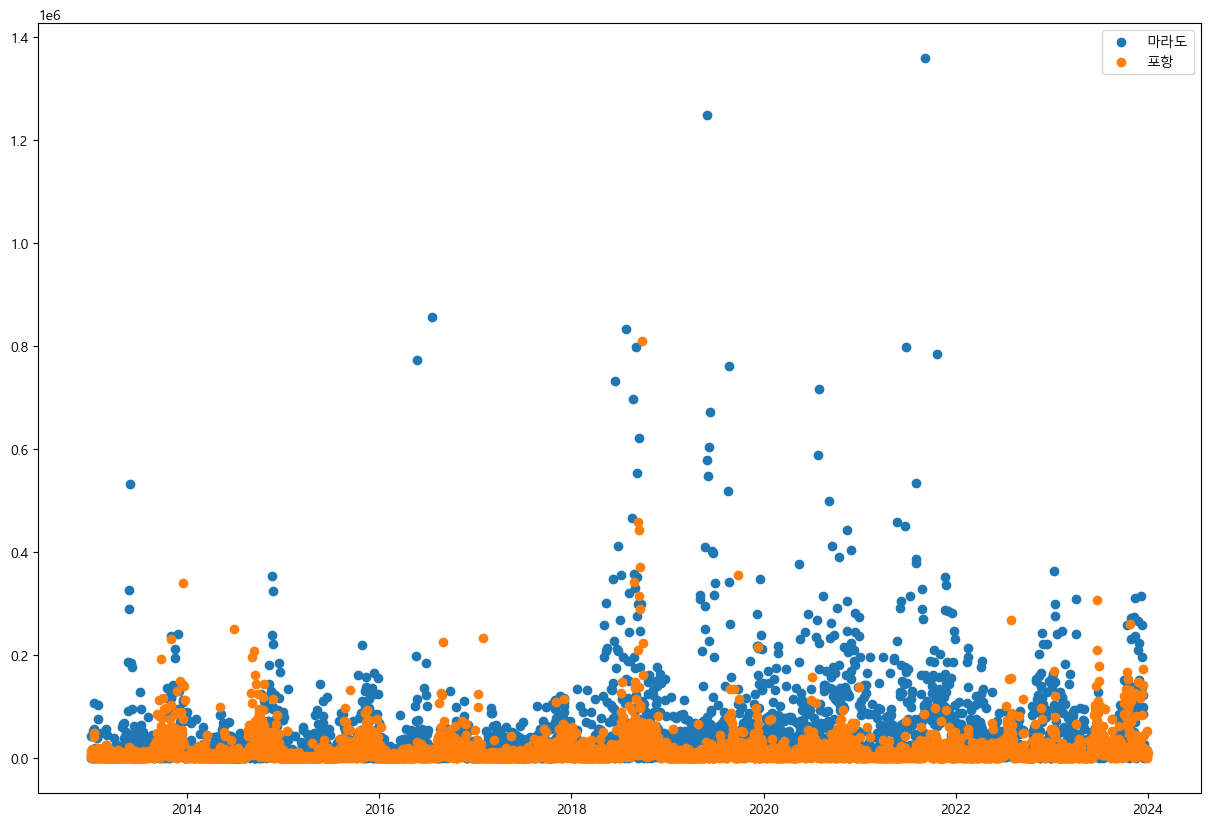

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(mar_test['ÏùºÏûê'], mar_test['Ï∂úÌïòÏ§ëÎüâ'],  label = 'ÎßàÎùºÎèÑ')
plt.scatter(poh_test['ÏùºÏûê'], poh_test['Ï∂úÌïòÏ§ëÎüâ'], label = 'Ìè¨Ìï≠')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# ===== Î∂ÑÏÑù ÎåÄÏÉÅ =====
df = poh_test.copy()
target = 'Ï∂úÌïòÏ§ëÎüâ'
features = [
    'ÌèâÍ∑†Í∏∞Ïïï','ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ',	'ÌèâÍ∑† Í∏∞Ïò®','ÌèâÍ∑† ÏàòÏò®','Ï†ÅÏ†ïÏàòÏò®',	'ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ','ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ'
]

n_permutations = 1000
random_state = 0

# ===== Mutual Information + permutation p-value =====
def mi_perm_test_1d(x, y, n_perm=1000, rs=0):
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x_ = x[mask].reshape(-1, 1)
    y_ = y[mask]
    if len(y_) < 5 or np.nanstd(x_) == 0:
        return np.nan, np.nan

    X_scaled = StandardScaler().fit_transform(x_)

    rng = np.random.RandomState(rs)
    mi_true = mutual_info_regression(X_scaled, y_, random_state=rs)[0]

    null = []
    for _ in range(n_perm):
        y_perm = rng.permutation(y_)
        mi_perm = mutual_info_regression(X_scaled, y_perm, random_state=rs)[0]
        null.append(mi_perm)
    null = np.array(null)
    p_val = (null >= mi_true).mean()
    return mi_true, p_val

# ===== ÎûòÍ∑∏ Ï†ÅÏö©Ïö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ =====
df['_date'] = pd.to_datetime(df['ÏùºÏûê']) 
df = df.sort_values('_date').reset_index(drop=True)

lags = range(-10, 11)  # -10Ïùº ~ +10Ïùº

rows = []

for lag in lags:
    df_lag = df.copy()
    
    for col in features:
        df_lag[f'{col}_lag{lag}'] = df_lag[col].shift(-lag)  # lagÍ∞Ä ÏùåÏàòÎ©¥ ÎØ∏Îûò, ÏñëÏàòÎ©¥ Í≥ºÍ±∞

    Xcols = [f'{col}_lag{lag}' for col in features]
    valid = df_lag[[target] + Xcols].dropna().index

    if len(valid) < 8:
        continue

    y_vec = df_lag.loc[valid, target].to_numpy()

    for col in features:
        x_vec = df_lag.loc[valid, f'{col}_lag{lag}'].to_numpy()

        try:
            pr, pr_p = pearsonr(x_vec, y_vec)
        except Exception:
            pr, pr_p = (np.nan, np.nan)

        try:
            sr, sr_p = spearmanr(x_vec, y_vec)
        except Exception:
            sr, sr_p = (np.nan, np.nan)

        mi, mi_p = mi_perm_test_1d(x_vec, y_vec,
                                   n_perm=n_permutations,
                                   rs=random_state)

        rows.append({
            'Variable': col,
            'Lag': lag,
            'n': len(y_vec),
            'Pearson': pr, 'Pearson_p': pr_p,
            'Spearman': sr, 'Spearman_p': sr_p,
            'MI': mi, 'MI_p': mi_p
        })


# ===== Í≤∞Í≥º Ï†ïÎ¶¨ =====
result_lag = pd.DataFrame(rows)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨
result_lag = result_lag.sort_values(['Variable','Lag']).reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
print(result_lag.head(20))

# MI Í∏∞Ï§Ä ÏÉÅÏúÑ Î≥ÄÏàò Î≥¥Í∏∞
print("\nüîé Mutual Information Í∏∞Ï§Ä Top 10")
print(result_lag.sort_values('MI', ascending=False).head(10))

# ÌïÑÏöî Ïãú Ï†ÄÏû•
result_lag.to_excel("lagged_correlation_analysis_POH_dbd.xlsx", index=False)

   Variable  Lag     n   Pearson     Pearson_p  Spearman     Spearman_p  \
0      Ï†ÅÏ†ïÏàòÏò®  -10  3537  0.213063  1.363121e-37  0.351831  1.396165e-103   
1      Ï†ÅÏ†ïÏàòÏò®   -9  3538  0.218977  1.133739e-39  0.349824  2.245638e-102   
2      Ï†ÅÏ†ïÏàòÏò®   -8  3539  0.221098  1.933041e-40  0.341360   2.731735e-97   
3      Ï†ÅÏ†ïÏàòÏò®   -7  3540  0.209764  1.708327e-36  0.339372   3.874619e-96   
4      Ï†ÅÏ†ïÏàòÏò®   -6  3541  0.202594  4.079018e-34  0.333988   5.136263e-93   
5      Ï†ÅÏ†ïÏàòÏò®   -5  3542  0.207225  1.171285e-35  0.337097   7.475879e-95   
6      Ï†ÅÏ†ïÏàòÏò®   -4  3543  0.203003  2.871888e-34  0.334598   2.018932e-93   
7      Ï†ÅÏ†ïÏàòÏò®   -3  3544  0.197178  2.134946e-32  0.331004   2.253696e-91   
8      Ï†ÅÏ†ïÏàòÏò®   -2  3545  0.189171  6.464014e-30  0.321005   8.981484e-86   
9      Ï†ÅÏ†ïÏàòÏò®   -1  3546  0.184462  1.645790e-28  0.314981   1.651854e-82   
10     Ï†ÅÏ†ïÏàòÏò®    0  3547  0.178268  1.027187e-26  0.314649   2.368255e-82   
11     Ï†ÅÏ†

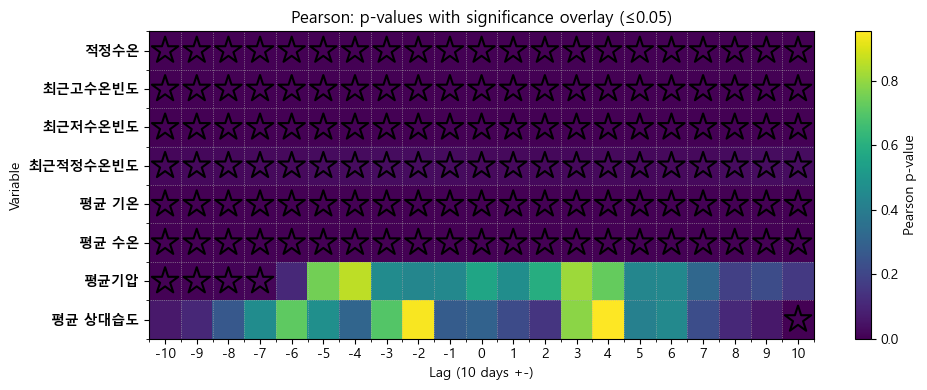

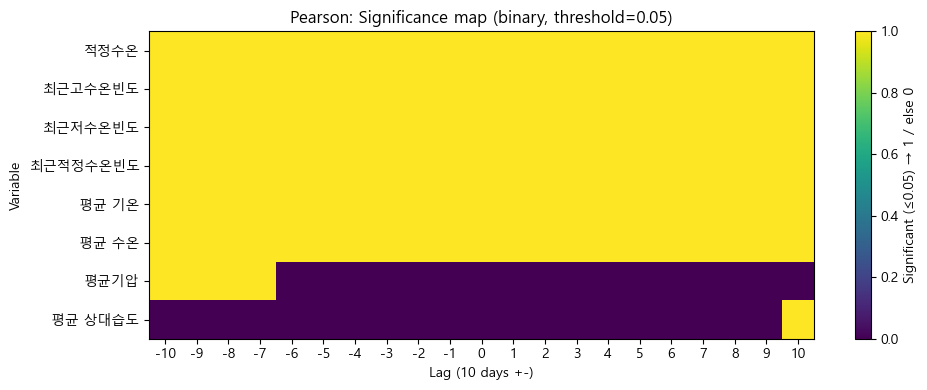

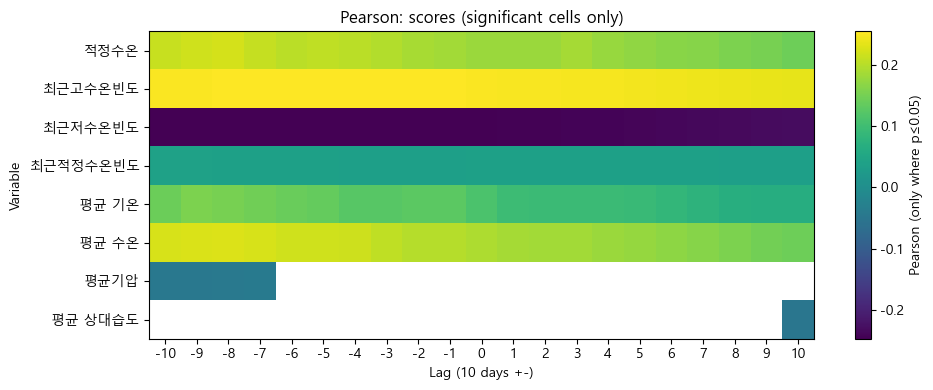

üîé Pearson Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ=0.05)


n_sig_lags        best_p  best_lag
Variable                                    
ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ           21  1.894567e-53        -3
ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ           21  3.875837e-50        -9
ÌèâÍ∑† ÏàòÏò®             21  1.085591e-42        -8
Ï†ÅÏ†ïÏàòÏò®              21  1.933041e-40        -8
ÌèâÍ∑† Í∏∞Ïò®             21  1.899895e-20        -9
ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ          21  1.849136e-02       -10
ÌèâÍ∑†Í∏∞Ïïï               4  5.913789e-03        -9
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ            1  2.796426e-03        10

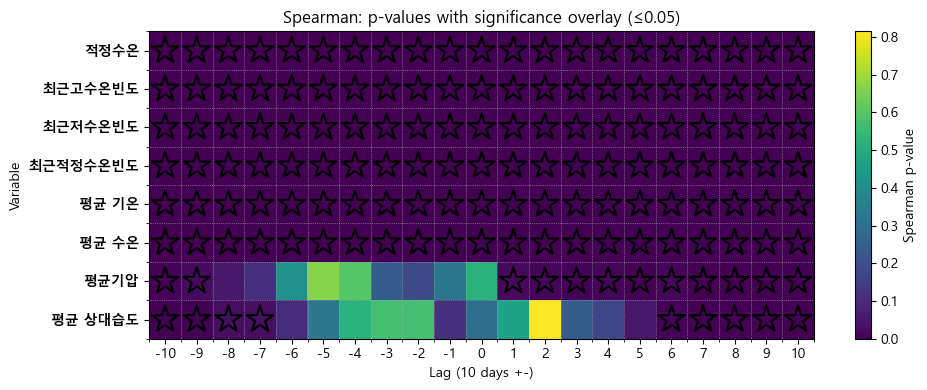

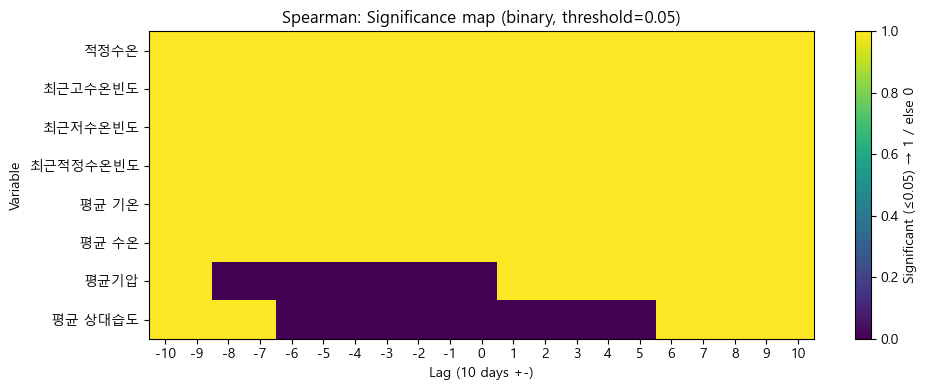

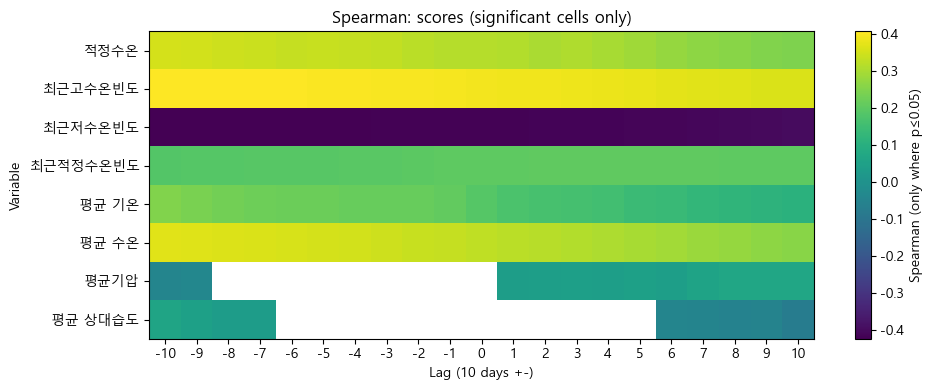

üîé Spearman Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ=0.05)


n_sig_lags         best_p  best_lag
Variable                                     
ÏµúÍ∑ºÏ†ÄÏàòÏò®ÎπàÎèÑ           21  1.732838e-153        -9
ÏµúÍ∑ºÍ≥†ÏàòÏò®ÎπàÎèÑ           21  1.518656e-140        -9
ÌèâÍ∑† ÏàòÏò®             21  5.269186e-115       -10
Ï†ÅÏ†ïÏàòÏò®              21  1.396165e-103       -10
ÌèâÍ∑† Í∏∞Ïò®             21   5.008719e-51       -10
ÏµúÍ∑ºÏ†ÅÏ†ïÏàòÏò®ÎπàÎèÑ          21   1.502211e-34         3
ÌèâÍ∑†Í∏∞Ïïï              12   4.053642e-05        10
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ            9   6.402398e-06        10

In [ ]:
def plot_sig_maps_striking(result_lag, metric_name, thresh=0.05):
    """
    result_lag: columns ['Variable','Lag', metric, metric+'_p'] ÌïÑÏöî
    metric_name: 'Pearson' | 'Spearman' | 'MI'
    thresh: Ïú†ÏùòÏàòÏ§Ä (Í∏∞Î≥∏ 0.05)
    """
    val_col = metric_name
    p_col   = f"{metric_name}_p"

    # 1) ÌîºÎ≤ó
    v_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=val_col, aggfunc='first')
    p_pivot = result_lag.pivot_table(index='Variable', columns='Lag', values=p_col,   aggfunc='first')

    # 2) Ïú†ÏùòÏÑ± Í∏∞Ï§Ä Î∞è Ï†ïÎ†¨
    sig_bool = (p_pivot <= thresh)
    sig_counts = sig_bool.sum(axis=1)

    # Ï†ïÎ†¨: Ïú†ÏùòÌïú lag Í∞úÏàò ‚Üì, ÏµúÏ†Ä p ‚Üë
    order = (sig_counts.sort_values(ascending=False)
                        .index.to_series()
                        .reindex(sig_counts.index)
                        .index)
    # ÏúÑ Ìïú Ï§ÑÏùÄ pandas Î≤ÑÏ†ÑÏóê Îî∞Îùº Í≤ΩÍ≥†Í∞Ä ÎÇòÏò¨ Ïàò ÏûàÏúºÎãà Îçî Í≤¨Í≥†ÌïòÍ≤å:
    order = sig_counts.sort_values(ascending=False).index

    v_pivot = v_pivot.loc[order]
    p_pivot = p_pivot.loc[order]
    sig_bool = sig_bool.loc[order]

    # 3) p-value ÌûàÌä∏Îßµ + ‚òÖ Ïò§Î≤ÑÎ†àÏù¥ (p‚â§thresh)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im = ax.imshow(p_pivot.values, aspect='auto')  # Í∏∞Î≥∏ Ïª¨Îü¨Îßµ ÏÇ¨Ïö©
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'{metric_name} p-value')

    # Ï∂ï ÎùºÎ≤®
    ax.set_xticks(np.arange(p_pivot.shape[1]))
    ax.set_xticklabels(p_pivot.columns)
    ax.set_yticks(np.arange(p_pivot.shape[0]))
    ax.set_yticklabels(p_pivot.index)

    ax.set_title(f'{metric_name}: p-values with significance overlay (‚â§{thresh})')
    ax.set_xlabel('Lag (10 days +-)')
    ax.set_ylabel('Variable')

    # Í∑∏Î¶¨Îìú(Í∞ÄÎ°ú/ÏÑ∏Î°ú) ÏïΩÌïòÍ≤å Ï∂îÍ∞Ä
    ax.set_xticks(np.arange(-.5, p_pivot.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, p_pivot.shape[0], 1), minor=True)
    ax.grid(which='minor', linestyle=':', linewidth=0.5)

    # ‚òÖ Ïò§Î≤ÑÎ†àÏù¥ (p ‚â§ threshÏù∏ ÏÖÄÏóê ÌÅºÏßÅÌïòÍ≤å ÌëúÏãú)
    rows, cols = np.where(sig_bool.values)
    # ÎßàÏª§Î•º ÌÅ¨Í≤å(s) ÌïòÍ≥†, ÌÖåÎëêÎ¶¨(edgecolors='black')Î°ú ÎààÏóê ÎùÑÍ≤å
    ax.scatter(cols, rows, marker='*', s=400, edgecolors='black', facecolors='none', linewidths=1.5)

    # Ïú†ÏùòÌïú lagÏù¥ ÌïòÎÇòÎùºÎèÑ ÏûàÎäî Î≥ÄÏàòÎäî ÎùºÎ≤®ÏùÑ bold Ï≤òÎ¶¨
    for yi, var in enumerate(p_pivot.index):
        if sig_counts.loc[var] > 0:
            ax.get_yticklabels()[yi].set_fontweight('bold')

    plt.tight_layout()
    plt.show()

    # 4) Ïù¥ÏßÑ Ïú†ÏùòÎßµ (0/1)
    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im2 = ax.imshow(sig_bool.values.astype(int), aspect='auto')
    cbar2 = plt.colorbar(im2, ax=ax)
    cbar2.set_label(f'Significant (‚â§{thresh}) ‚Üí 1 / else 0')
    ax.set_xticks(np.arange(sig_bool.shape[1])); ax.set_xticklabels(sig_bool.columns)
    ax.set_yticks(np.arange(sig_bool.shape[0])); ax.set_yticklabels(sig_bool.index)
    ax.set_title(f'{metric_name}: Significance map (binary, threshold={thresh})')
    ax.set_xlabel('Lag (10 days +-)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 5) Ïú†Ïùò Íµ¨Í∞ÑÎßå Ï†êÏàò ÌûàÌä∏Îßµ (ÎπÑÏú†ÏùòÎäî NaN ‚Üí ÎπÑÏõå Î≥¥ÏûÑ)
    v_sig = v_pivot.copy()
    v_sig.values[~sig_bool.values] = np.nan

    fig, ax = plt.subplots(figsize=(10, max(4, len(order)*0.35)))
    im3 = ax.imshow(v_sig.values, aspect='auto')
    cbar3 = plt.colorbar(im3, ax=ax)
    cbar3.set_label(f'{metric_name} (only where p‚â§{thresh})')
    ax.set_xticks(np.arange(v_sig.shape[1])); ax.set_xticklabels(v_sig.columns)
    ax.set_yticks(np.arange(v_sig.shape[0])); ax.set_yticklabels(v_sig.index)
    ax.set_title(f'{metric_name}: scores (significant cells only)')
    ax.set_xlabel('Lag (10 days +-)'); ax.set_ylabel('Variable')
    plt.tight_layout(); plt.show()

    # 6) ÏöîÏïΩÌëú: Ïú†Ïùò lag Í∞úÏàò, ÏµúÏ†Ä p, Í∑∏ÎïåÏùò lag
    summary = pd.DataFrame({
        'n_sig_lags': sig_counts,
        'best_p': p_pivot.min(axis=1),
        'best_lag': p_pivot.idxmin(axis=1),
    }).sort_values(['n_sig_lags','best_p'], ascending=[False, True])

    print(f"üîé {metric_name} Ïú†ÏùòÏÑ± ÏöîÏïΩ (ÏûÑÍ≥Ñ={thresh})")
    display(summary)  # Ï£ºÌîºÌÑ∞ ÌôòÍ≤ΩÏùº Í≤ΩÏö∞; ÌÑ∞ÎØ∏ÎÑêÏù¥Î©¥ print(summary)

    return summary

# Ïã§Ìñâ ÏòàÏãú (ÏõêÌïòÎäî Í≤ÉÎßå Ìò∏Ï∂ú)
# summary_mi       = plot_sig_maps_striking(result_lag, 'MI',       thresh=0.05)
summary_pearson  = plot_sig_maps_striking(result_lag, 'Pearson',  thresh=0.05)
summary_spearman = plot_sig_maps_striking(result_lag, 'Spearman', thresh=0.05)


In [ ]:
df

NameError: name 'df' is not defined